ANOVA Results per Journal:

JSSC: Input p-value = 1.1561256982063387e-08, Output p-value = 9.732150378829683e-06

Atmospheric Environment: Input p-value = 0.03267732248787094, Output p-value = 0.02579367580292429

JABE: Input p-value = 0.9989549173347894, Output p-value = 0.9988230916672622

Nature Genetics: Input p-value = 5.581405907421793e-06, Output p-value = 1.864539656838706e-05

Tukey HSD Results for JSSC - Input:
              group1           group2  meandiff   p-adj   lower   upper  \
0       3D Line Plot  3D Surface Plot   -1.0000  0.9799 -2.8893  0.8893   
1       3D Line Plot         Bar Plot   -1.0000  0.1155 -2.0771  0.0771   
2       3D Line Plot      Binary Plot   -1.0000  0.7655 -2.4936  0.4936   
3       3D Line Plot         Box Plot   -0.9286  0.1689 -1.9695  0.1124   
4       3D Line Plot    Calendar Plot   -1.0000  0.9799 -2.8893  0.8893   
..               ...              ...       ...     ...     ...     ...   
491  Trajectory Plot     Venn Diagram   -1.0000  0

/tmp/ipykernel_282/3010337230.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_journal, x='Type', y='Input', ax=axes[0], capsize=0.2, ci='sd', dodge=True)
/tmp/ipykernel_282/3010337230.py:74: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_journal, x='Type', y='Output', ax=axes[1], capsize=0.2, ci='sd', dodge=True)


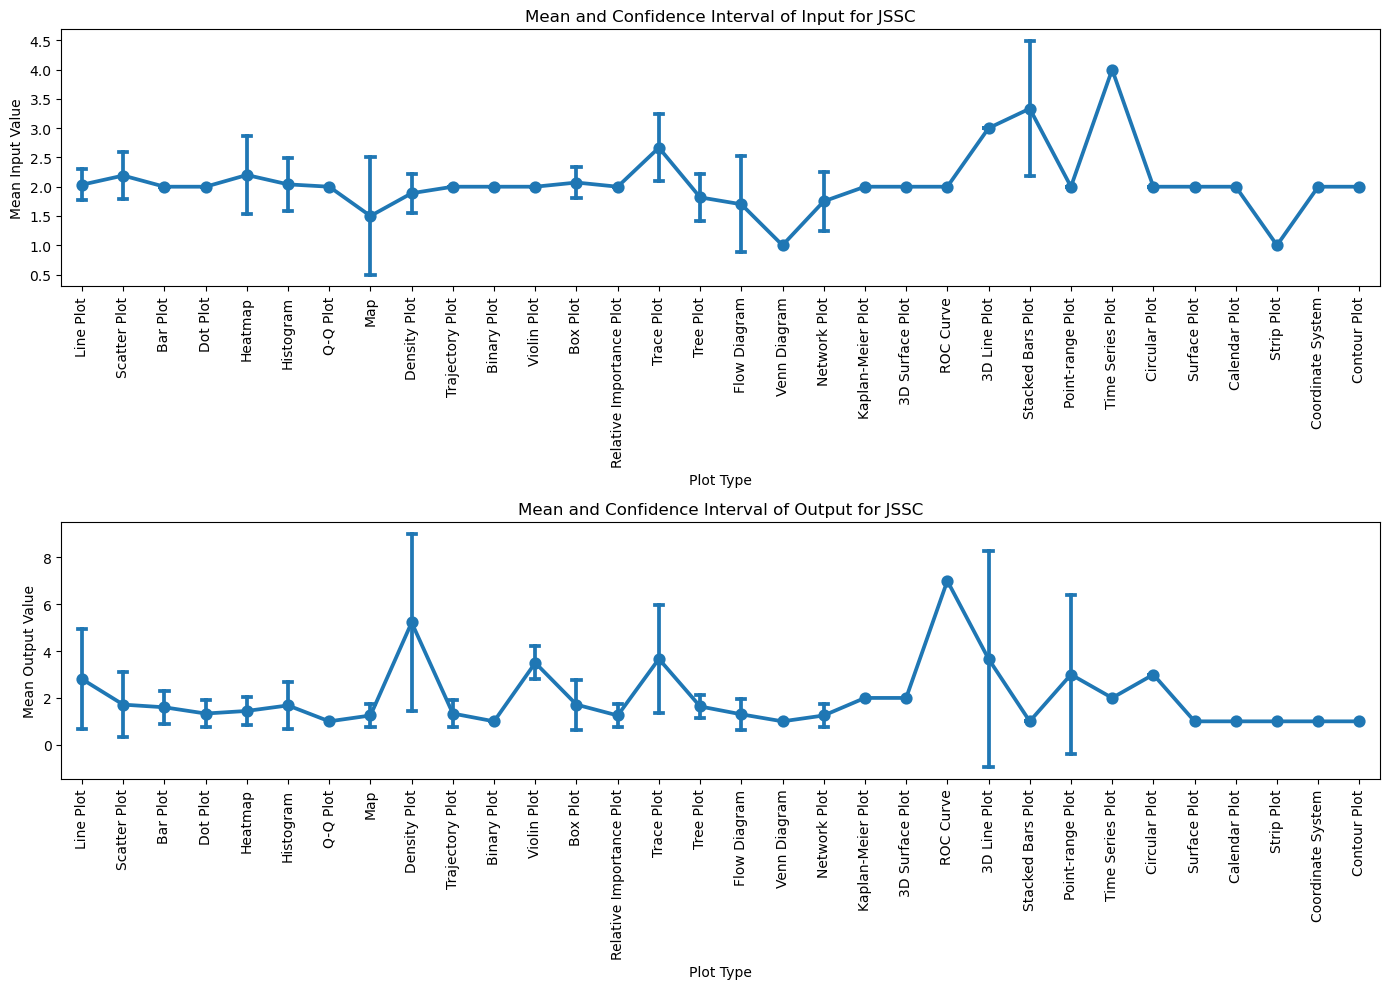

/tmp/ipykernel_282/3010337230.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_journal, x='Type', y='Input', ax=axes[0], capsize=0.2, ci='sd', dodge=True)
/tmp/ipykernel_282/3010337230.py:74: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_journal, x='Type', y='Output', ax=axes[1], capsize=0.2, ci='sd', dodge=True)


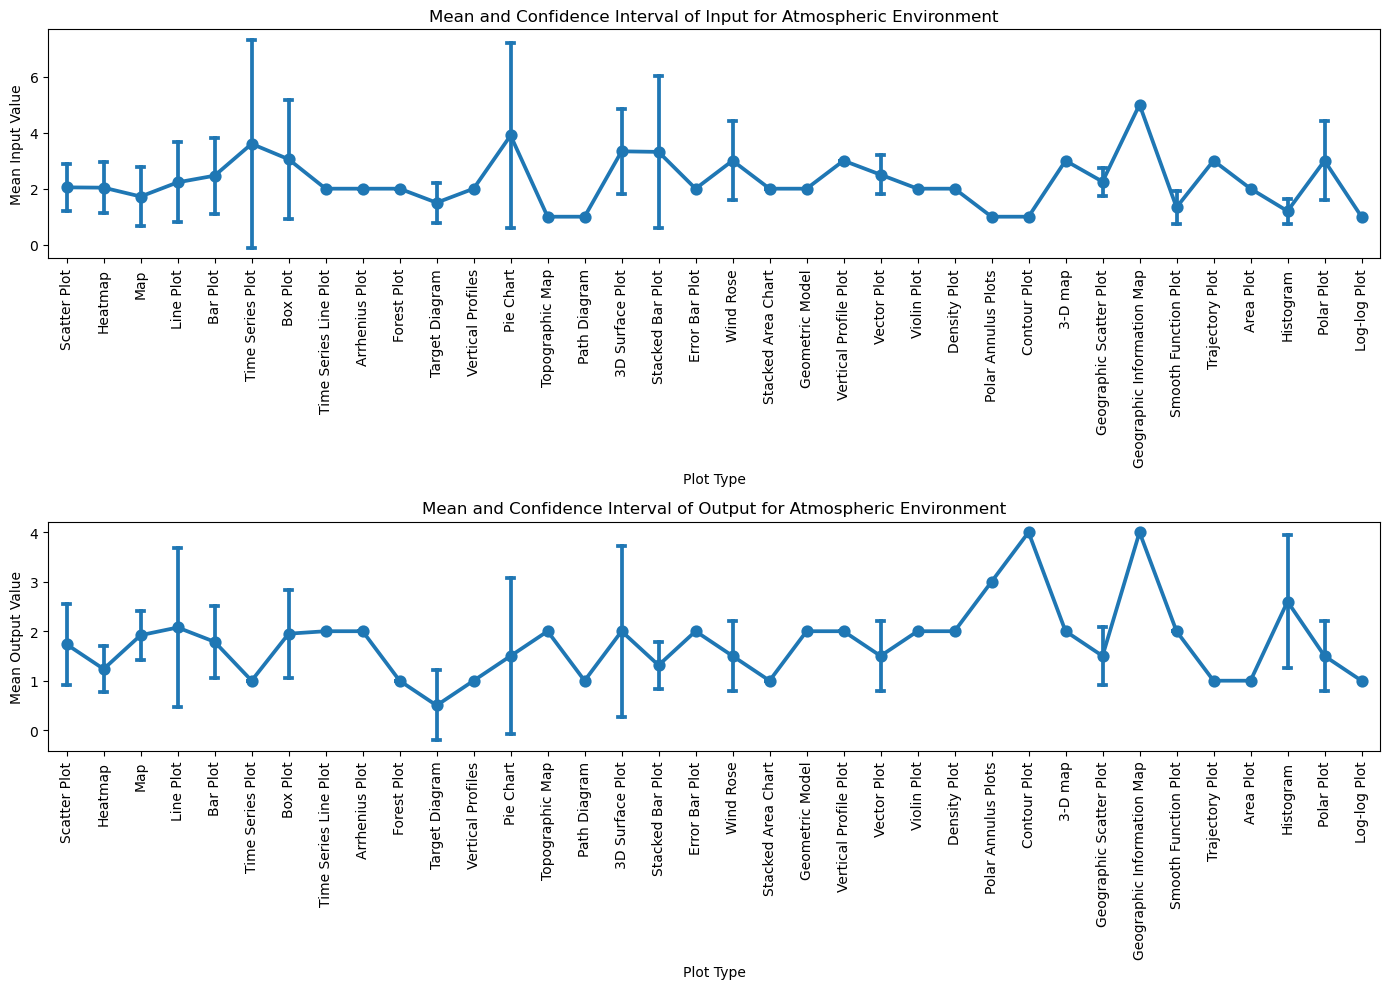

/tmp/ipykernel_282/3010337230.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_journal, x='Type', y='Input', ax=axes[0], capsize=0.2, ci='sd', dodge=True)
/tmp/ipykernel_282/3010337230.py:74: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_journal, x='Type', y='Output', ax=axes[1], capsize=0.2, ci='sd', dodge=True)


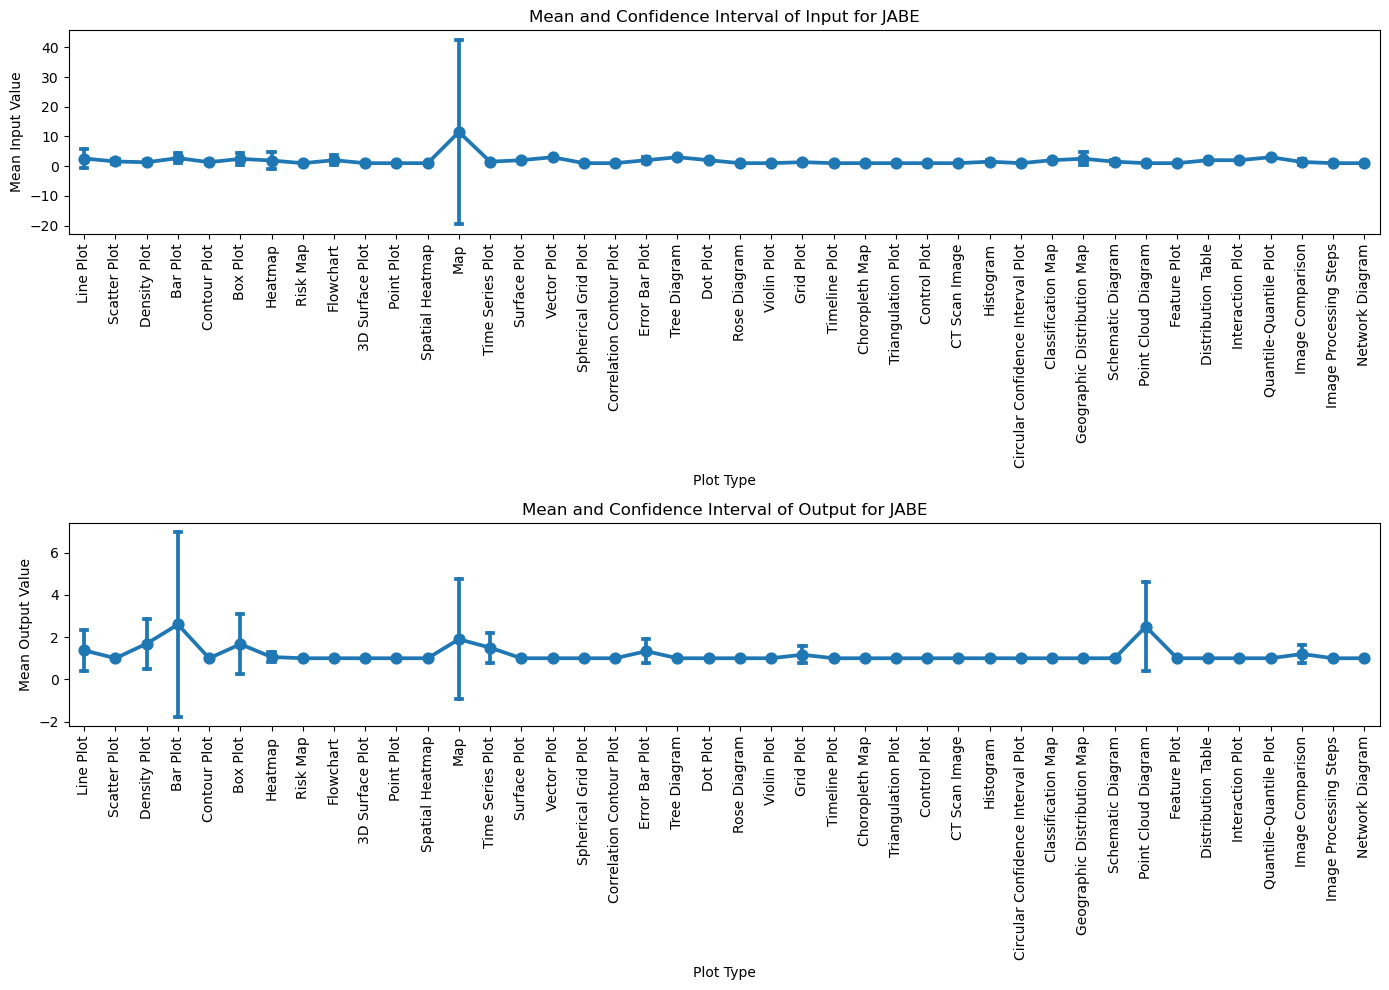

/tmp/ipykernel_282/3010337230.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_journal, x='Type', y='Input', ax=axes[0], capsize=0.2, ci='sd', dodge=True)
/tmp/ipykernel_282/3010337230.py:74: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_journal, x='Type', y='Output', ax=axes[1], capsize=0.2, ci='sd', dodge=True)


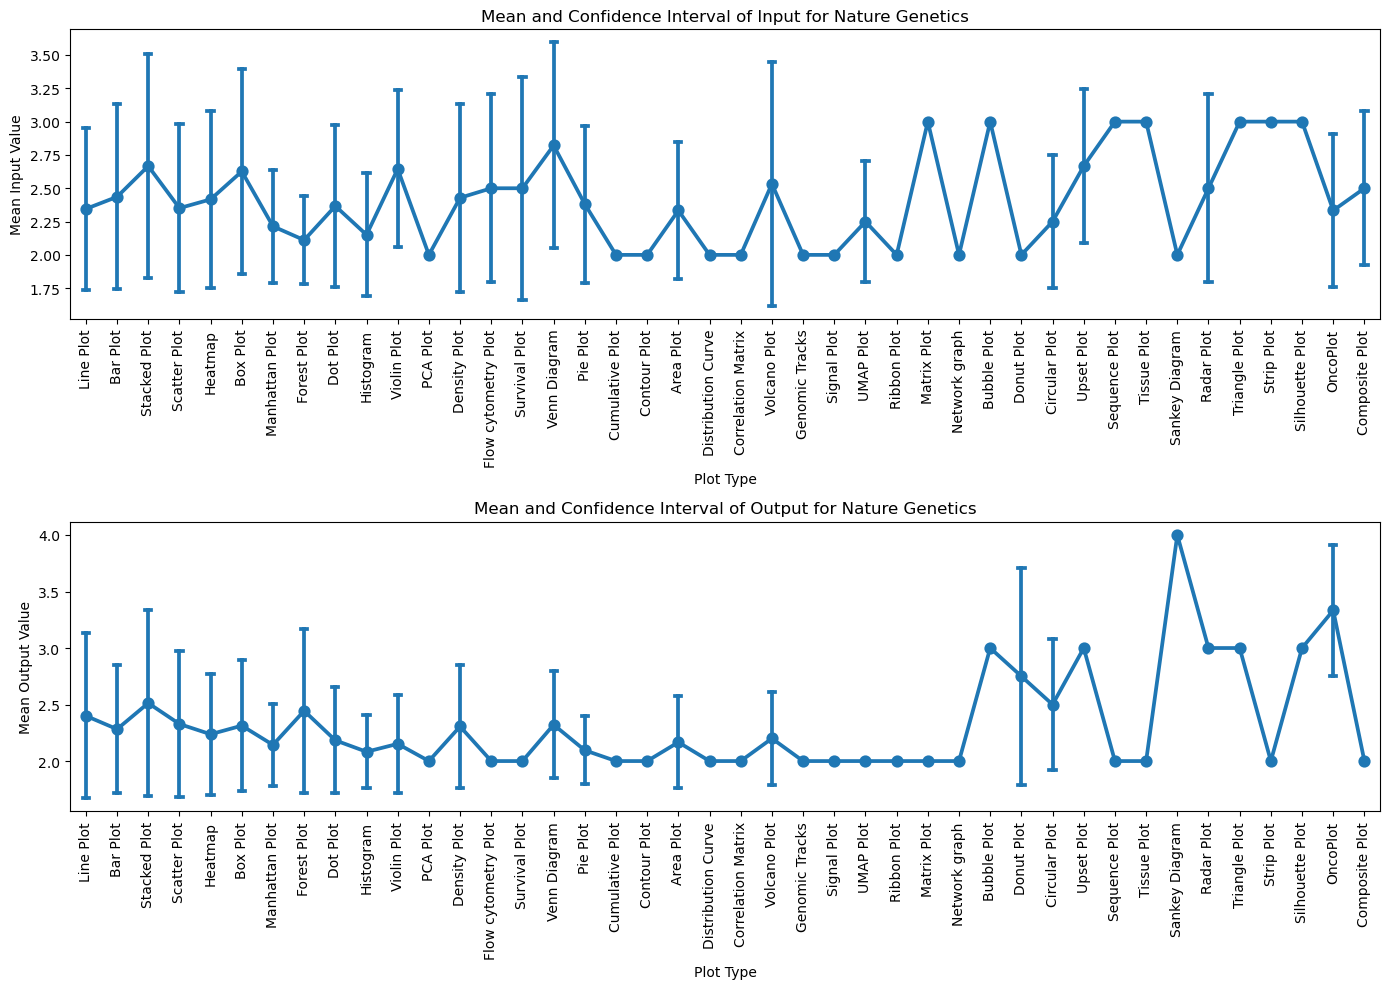

In [2]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Merged_Data.csv")

# Convert 'Input' and 'Output' to numeric, handling errors
df['Input'] = pd.to_numeric(df['Input'], errors='coerce')
df['Output'] = pd.to_numeric(df['Output'], errors='coerce')
df = df.dropna(subset=['Input', 'Output'])

# Identify all unique plot types across journals
all_plot_types = df['Type'].unique().tolist()

# Filter dataset to include all plot types
df_common_types = df[df['Type'].isin(all_plot_types)]

# Create a dictionary to store data for each journal
all_types_per_journal = {}

for journal in df_common_types['Journal'].unique():
    journal_df = df_common_types[df_common_types['Journal'] == journal]
    all_types_per_journal[journal] = journal_df

# Perform ANOVA per Journal
anova_results = {}

for journal, df_journal in all_types_per_journal.items():
    anova_input_pval = stats.f_oneway(
        *[df_journal[df_journal['Type'] == plot_type]['Input'] for plot_type in all_plot_types if plot_type in df_journal['Type'].unique()]
    ).pvalue
    
    anova_output_pval = stats.f_oneway(
        *[df_journal[df_journal['Type'] == plot_type]['Output'] for plot_type in all_plot_types if plot_type in df_journal['Type'].unique()]
    ).pvalue
    
    anova_results[journal] = {'Input p-value': anova_input_pval, 'Output p-value': anova_output_pval}

# Perform Tukey’s HSD per Journal
tukey_results = {}

for journal, df_journal in all_types_per_journal.items():
    if anova_results[journal]['Input p-value'] < 0.05:
        tukey_input = pairwise_tukeyhsd(df_journal['Input'], df_journal['Type'])
        tukey_results[f"{journal} - Input"] = pd.DataFrame(tukey_input.summary().data[1:], columns=tukey_input.summary().data[0])
    
    if anova_results[journal]['Output p-value'] < 0.05:
        tukey_output = pairwise_tukeyhsd(df_journal['Output'], df_journal['Type'])
        tukey_results[f"{journal} - Output"] = pd.DataFrame(tukey_output.summary().data[1:], columns=tukey_output.summary().data[0])

# Print ANOVA results
print("ANOVA Results per Journal:")
for journal, pvals in anova_results.items():
    print(f"\n{journal}: Input p-value = {pvals['Input p-value']}, Output p-value = {pvals['Output p-value']}")

# Print Tukey HSD results
for key, tukey_df in tukey_results.items():
    print(f"\nTukey HSD Results for {key}:")
    print(tukey_df)

# Visualization: Mean and Confidence Intervals per Journal
for journal, df_journal in all_types_per_journal.items():
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    sns.pointplot(data=df_journal, x='Type', y='Input', ax=axes[0], capsize=0.2, ci='sd', dodge=True)
    axes[0].set_title(f'Mean and Confidence Interval of Input for {journal}')
    axes[0].set_xlabel('Plot Type')
    axes[0].set_ylabel('Mean Input Value')
    axes[0].tick_params(axis='x', rotation=90)
    
    sns.pointplot(data=df_journal, x='Type', y='Output', ax=axes[1], capsize=0.2, ci='sd', dodge=True)
    axes[1].set_title(f'Mean and Confidence Interval of Output for {journal}')
    axes[1].set_xlabel('Plot Type')
    axes[1].set_ylabel('Mean Output Value')
    axes[1].tick_params(axis='x', rotation=90)
    
    plt.tight_layout()
    plt.show()


ANOVA Results per Journal:

JSSC: Input p-value = 0.16554313681610827, Output p-value = 9.392244065230825e-05

Atmospheric Environment: Input p-value = 0.030535780576430506, Output p-value = 0.0009837971472891128

JABE: Input p-value = 0.6875636909736316, Output p-value = 0.05931990733467096

Nature Genetics: Input p-value = 4.062375855877092e-07, Output p-value = 0.002769601695762345

Tukey HSD Results for JSSC - Output:
          group1        group2  meandiff   p-adj   lower   upper  reject
0       Bar Plot      Box Plot    0.1143  1.0000 -1.9501  2.1787   False
1       Bar Plot       Heatmap   -0.1556  0.9998 -1.8987  1.5875   False
2       Bar Plot     Line Plot    1.2034  0.2874 -0.4393  2.8461   False
3       Bar Plot  Scatter Plot    0.1143  1.0000 -1.8014  2.0299   False
4       Bar Plot   Violin Plot    1.9000  0.7177 -1.9621  5.7621   False
5       Box Plot       Heatmap   -0.2698  0.9958 -1.7957  1.2560   False
6       Box Plot     Line Plot    1.0891  0.2321 -0.3209  2.499

/tmp/ipykernel_562/3323248146.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_journal, x='Type', y='Input', ax=axes[0], capsize=0.2, ci='sd')
/tmp/ipykernel_562/3323248146.py:74: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_journal, x='Type', y='Output', ax=axes[1], capsize=0.2, ci='sd')


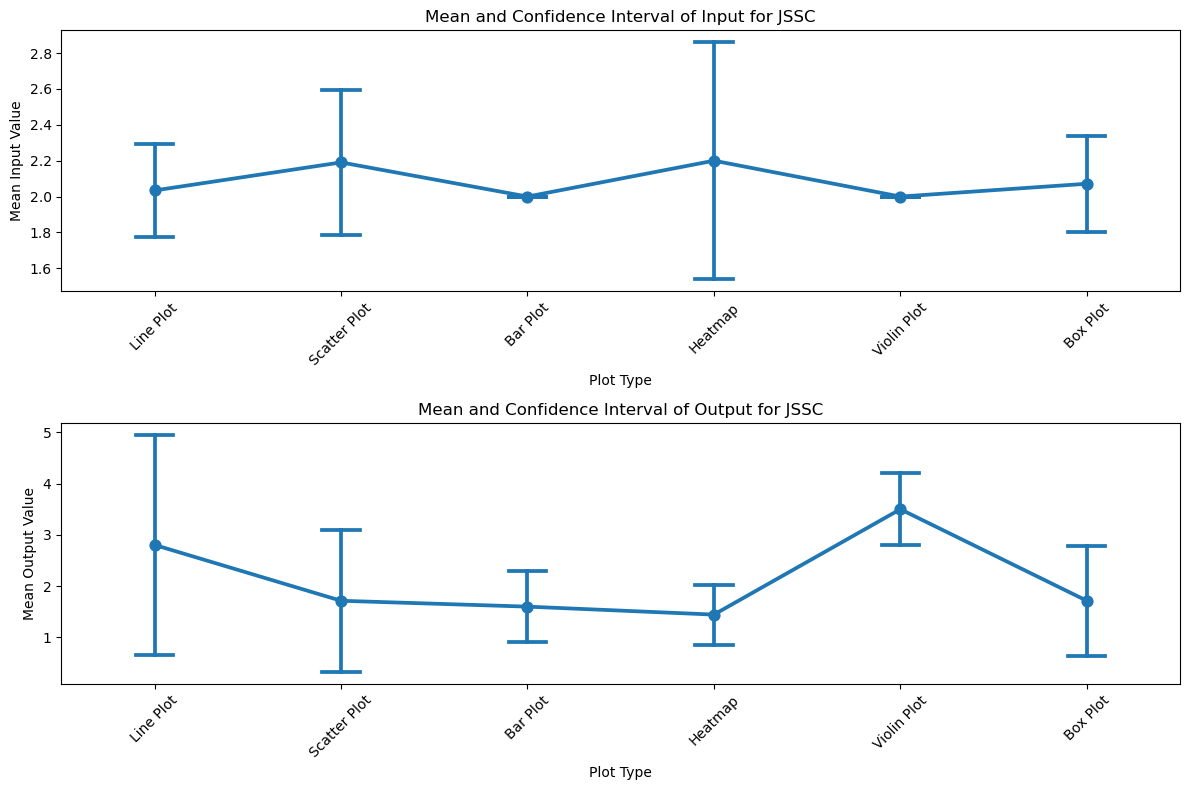

/tmp/ipykernel_562/3323248146.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_journal, x='Type', y='Input', ax=axes[0], capsize=0.2, ci='sd')
/tmp/ipykernel_562/3323248146.py:74: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_journal, x='Type', y='Output', ax=axes[1], capsize=0.2, ci='sd')


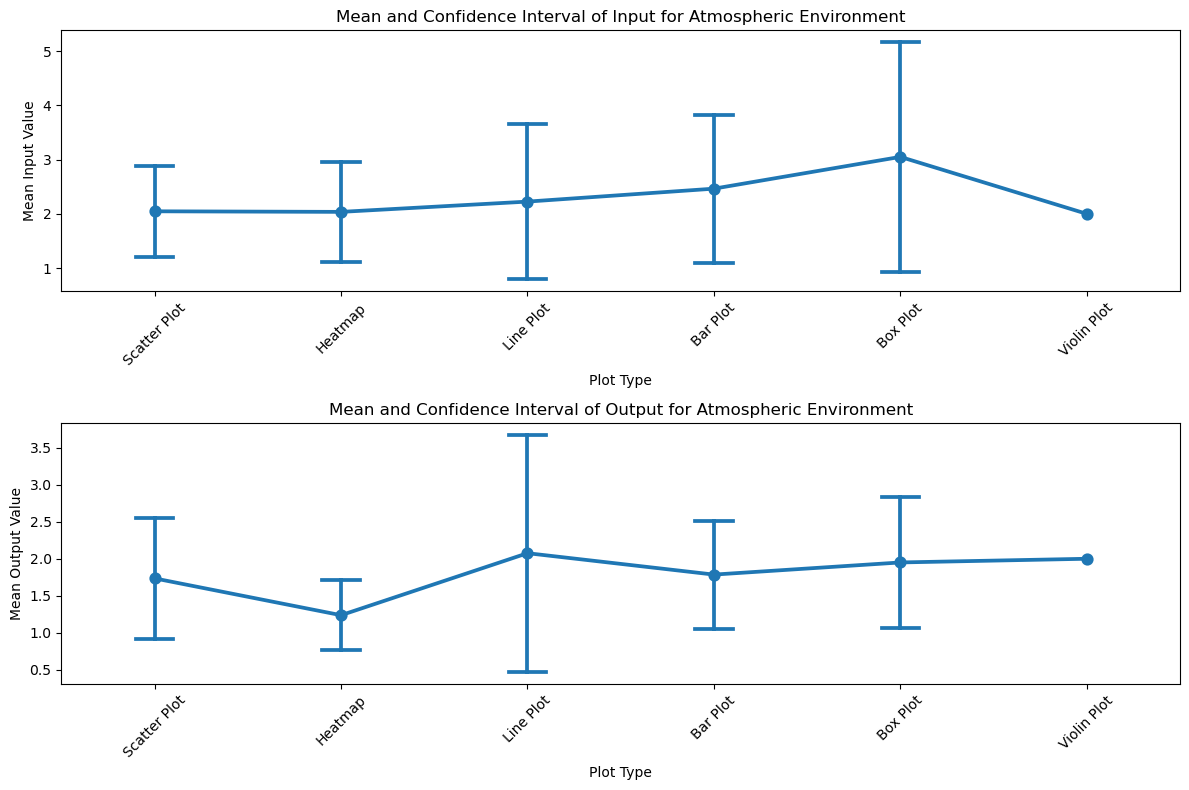

/tmp/ipykernel_562/3323248146.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_journal, x='Type', y='Input', ax=axes[0], capsize=0.2, ci='sd')
/tmp/ipykernel_562/3323248146.py:74: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_journal, x='Type', y='Output', ax=axes[1], capsize=0.2, ci='sd')


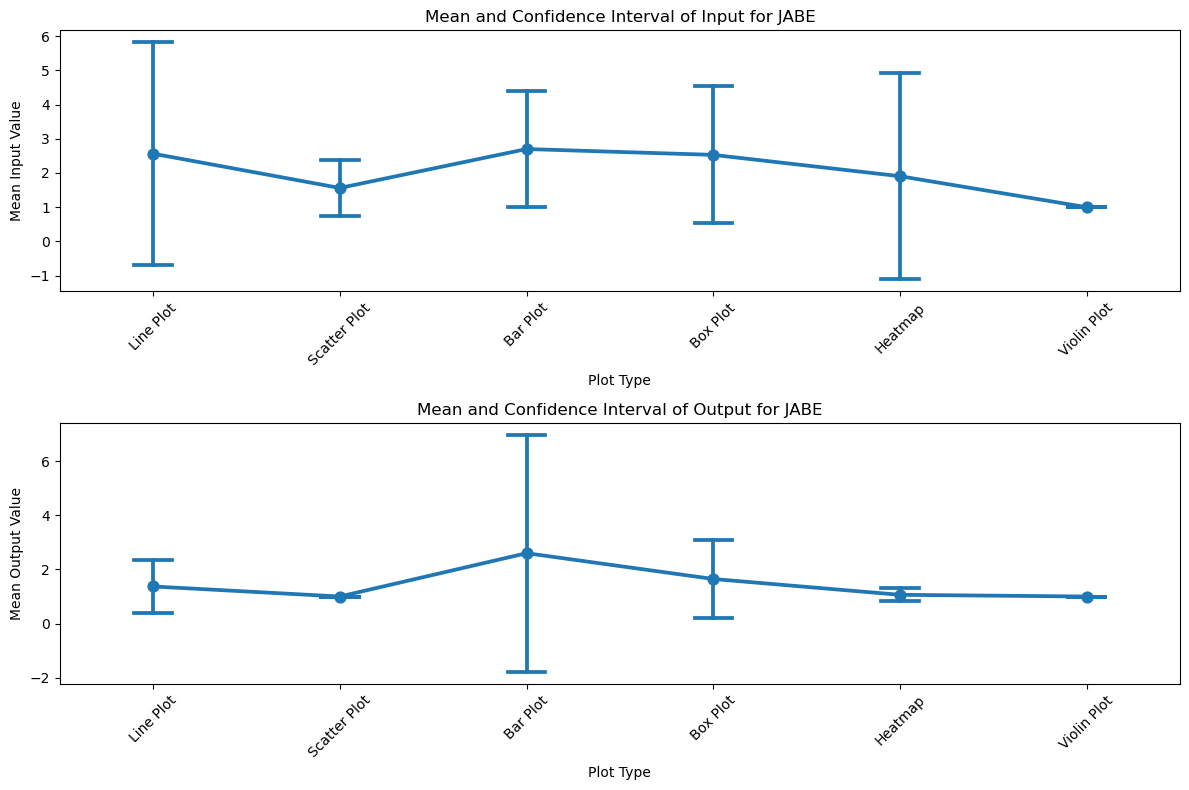

/tmp/ipykernel_562/3323248146.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_journal, x='Type', y='Input', ax=axes[0], capsize=0.2, ci='sd')
/tmp/ipykernel_562/3323248146.py:74: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_journal, x='Type', y='Output', ax=axes[1], capsize=0.2, ci='sd')


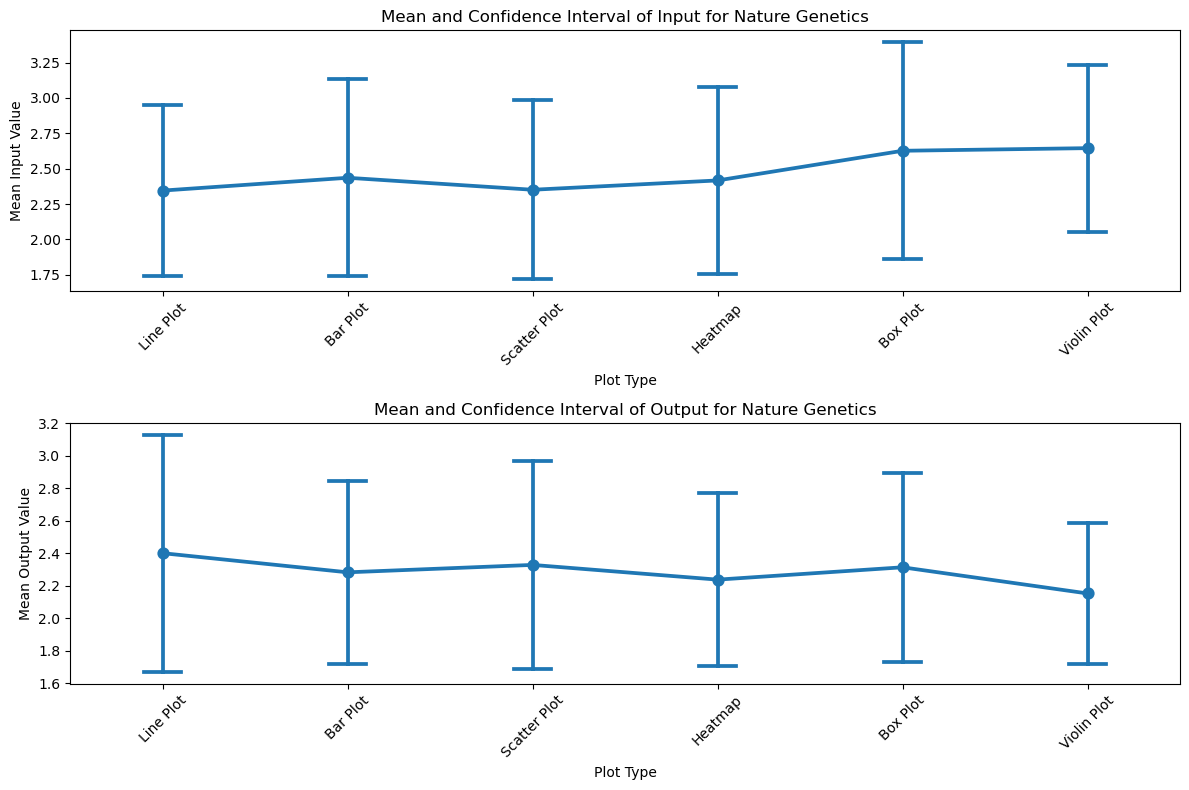

In [4]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Merged_Data.csv")

# Convert 'Input' and 'Output' to numeric, handling errors
df['Input'] = pd.to_numeric(df['Input'], errors='coerce')
df['Output'] = pd.to_numeric(df['Output'], errors='coerce')
df = df.dropna(subset=['Input', 'Output'])

# Identify the top 6 most common plot types across all journals
top_6_types = df['Type'].value_counts().nlargest(6).index.tolist()

# Filter dataset to include only these common types
df_common_types = df[df['Type'].isin(top_6_types)]

# Create a dictionary to store data for each journal with the top 6 plot types
top_6_per_journal = {}

for journal in df_common_types['Journal'].unique():
    journal_df = df_common_types[df_common_types['Journal'] == journal]
    top_6_per_journal[journal] = journal_df

# Perform ANOVA per Journal
anova_results = {}

for journal, df_journal in top_6_per_journal.items():
    anova_input_pval = stats.f_oneway(
        *[df_journal[df_journal['Type'] == plot_type]['Input'] for plot_type in top_6_types]
    ).pvalue
    
    anova_output_pval = stats.f_oneway(
        *[df_journal[df_journal['Type'] == plot_type]['Output'] for plot_type in top_6_types]
    ).pvalue
    
    anova_results[journal] = {'Input p-value': anova_input_pval, 'Output p-value': anova_output_pval}

# Perform Tukey’s HSD per Journal
tukey_results = {}

for journal, df_journal in top_6_per_journal.items():
    if anova_results[journal]['Input p-value'] < 0.05:
        tukey_input = pairwise_tukeyhsd(df_journal['Input'], df_journal['Type'])
        tukey_results[f"{journal} - Input"] = pd.DataFrame(tukey_input.summary().data[1:], columns=tukey_input.summary().data[0])
    
    if anova_results[journal]['Output p-value'] < 0.05:
        tukey_output = pairwise_tukeyhsd(df_journal['Output'], df_journal['Type'])
        tukey_results[f"{journal} - Output"] = pd.DataFrame(tukey_output.summary().data[1:], columns=tukey_output.summary().data[0])

# Print ANOVA results
print("ANOVA Results per Journal:")
for journal, pvals in anova_results.items():
    print(f"\n{journal}: Input p-value = {pvals['Input p-value']}, Output p-value = {pvals['Output p-value']}")

# Print Tukey HSD results
for key, tukey_df in tukey_results.items():
    print(f"\nTukey HSD Results for {key}:")
    print(tukey_df)

# Visualization: Mean and Confidence Intervals per Journal
for journal, df_journal in top_6_per_journal.items():
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    
    sns.pointplot(data=df_journal, x='Type', y='Input', ax=axes[0], capsize=0.2, ci='sd')
    axes[0].set_title(f'Mean and Confidence Interval of Input for {journal}')
    axes[0].set_xlabel('Plot Type')
    axes[0].set_ylabel('Mean Input Value')
    axes[0].tick_params(axis='x', rotation=45)
    
    sns.pointplot(data=df_journal, x='Type', y='Output', ax=axes[1], capsize=0.2, ci='sd')
    axes[1].set_title(f'Mean and Confidence Interval of Output for {journal}')
    axes[1].set_xlabel('Plot Type')
    axes[1].set_ylabel('Mean Output Value')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


ANOVA Results Across Journals:

Line Plot: Input p-value = 0.058684544433257615, Output p-value = 3.880784283113281e-10

Bar Plot: Input p-value = 0.2624524505676664, Output p-value = 1.12190554254501e-05

Scatter Plot: Input p-value = 2.494689588292861e-06, Output p-value = 1.9751582710094834e-17

Heatmap: Input p-value = 0.04742129628593888, Output p-value = 1.527048569797079e-42

Box Plot: Input p-value = 0.059701483427880814, Output p-value = 9.850412863620258e-05

Violin Plot: Input p-value = 0.000489776931481944, Output p-value = 1.3819246915092412e-06

Tukey HSD Results for Line Plot - Output:
                    group1           group2  meandiff   p-adj   lower   upper  \
0  Atmospheric Environment             JABE   -0.7043  0.0090 -1.2788 -0.1298   
1  Atmospheric Environment             JSSC    0.7281  0.0007  0.2414  1.2149   
2  Atmospheric Environment  Nature Genetics    0.3247  0.2000 -0.0997  0.7492   
3                     JABE             JSSC    1.4325  0.0000  0.882

/tmp/ipykernel_284/2552111563.py:69: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_filtered, x='Journal', y='Input', ax=axes[0], capsize=0.2, ci='sd')
/tmp/ipykernel_284/2552111563.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_filtered, x='Journal', y='Output', ax=axes[1], capsize=0.2, ci='sd')


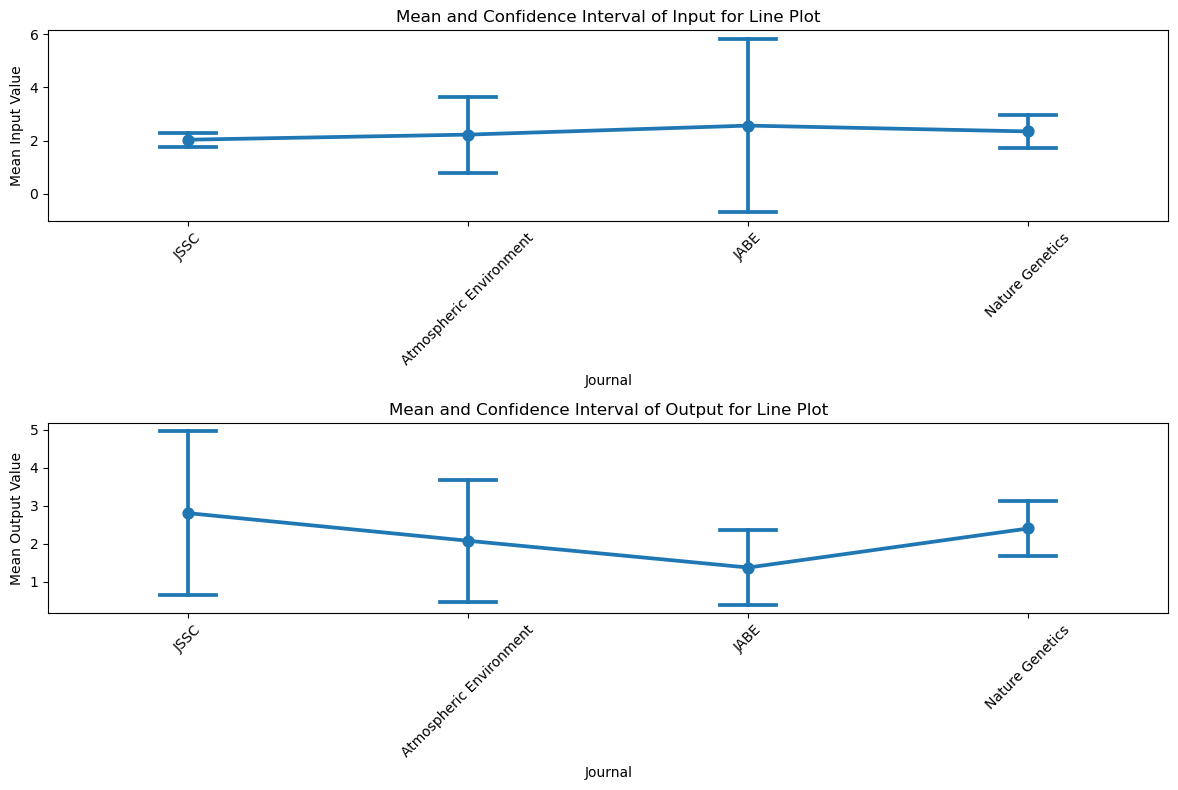

/tmp/ipykernel_284/2552111563.py:69: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_filtered, x='Journal', y='Input', ax=axes[0], capsize=0.2, ci='sd')
/tmp/ipykernel_284/2552111563.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_filtered, x='Journal', y='Output', ax=axes[1], capsize=0.2, ci='sd')


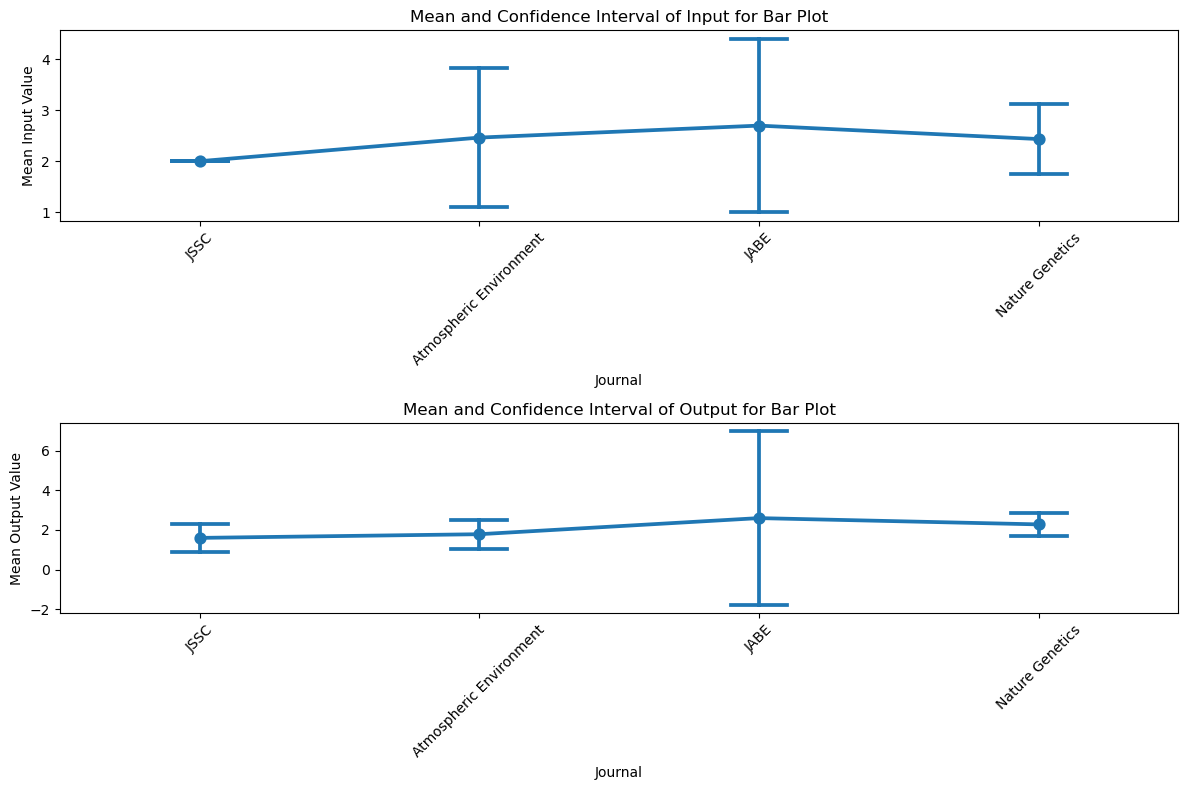

/tmp/ipykernel_284/2552111563.py:69: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_filtered, x='Journal', y='Input', ax=axes[0], capsize=0.2, ci='sd')
/tmp/ipykernel_284/2552111563.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_filtered, x='Journal', y='Output', ax=axes[1], capsize=0.2, ci='sd')


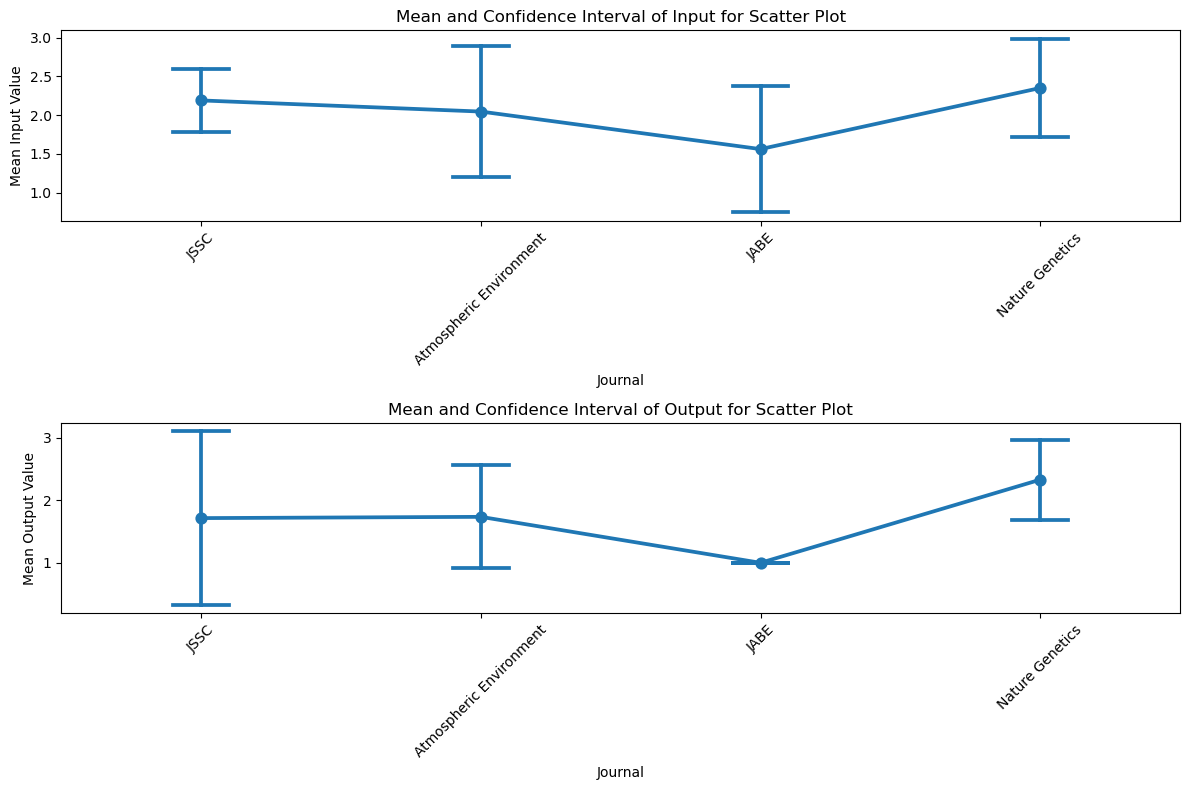

/tmp/ipykernel_284/2552111563.py:69: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_filtered, x='Journal', y='Input', ax=axes[0], capsize=0.2, ci='sd')
/tmp/ipykernel_284/2552111563.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_filtered, x='Journal', y='Output', ax=axes[1], capsize=0.2, ci='sd')


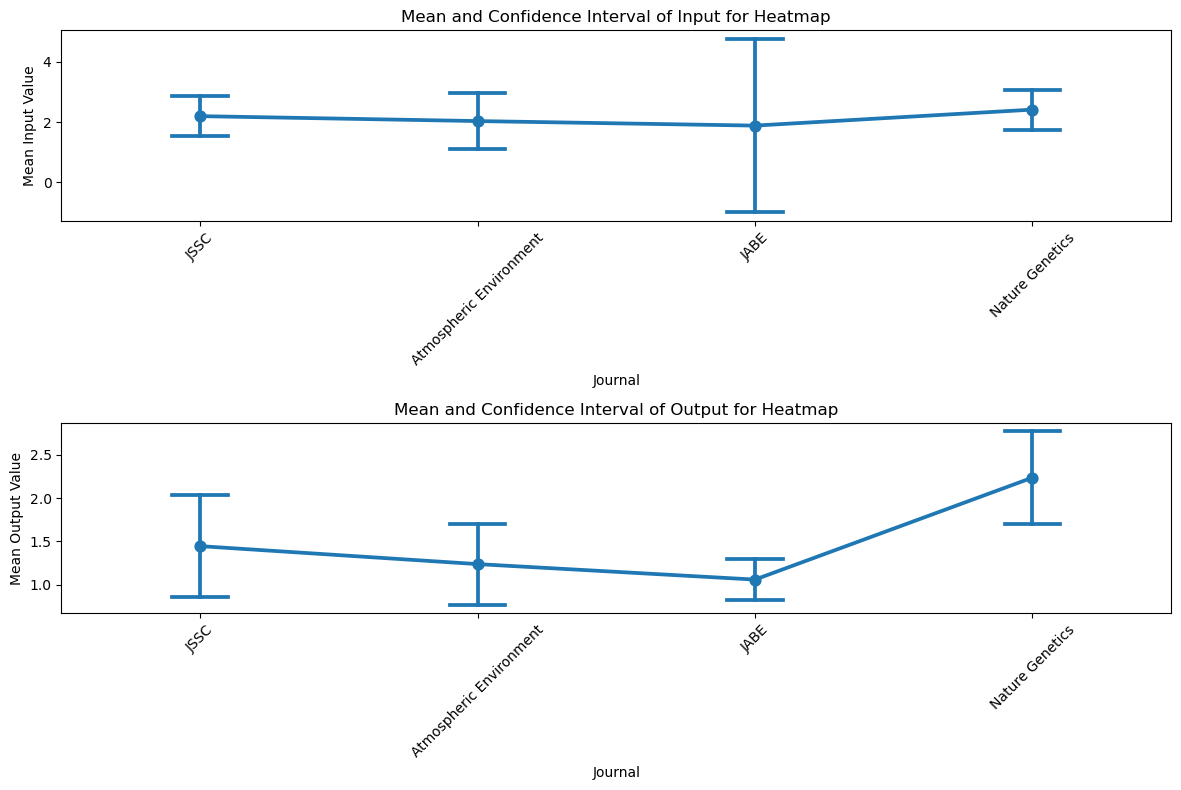

/tmp/ipykernel_284/2552111563.py:69: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_filtered, x='Journal', y='Input', ax=axes[0], capsize=0.2, ci='sd')
/tmp/ipykernel_284/2552111563.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_filtered, x='Journal', y='Output', ax=axes[1], capsize=0.2, ci='sd')


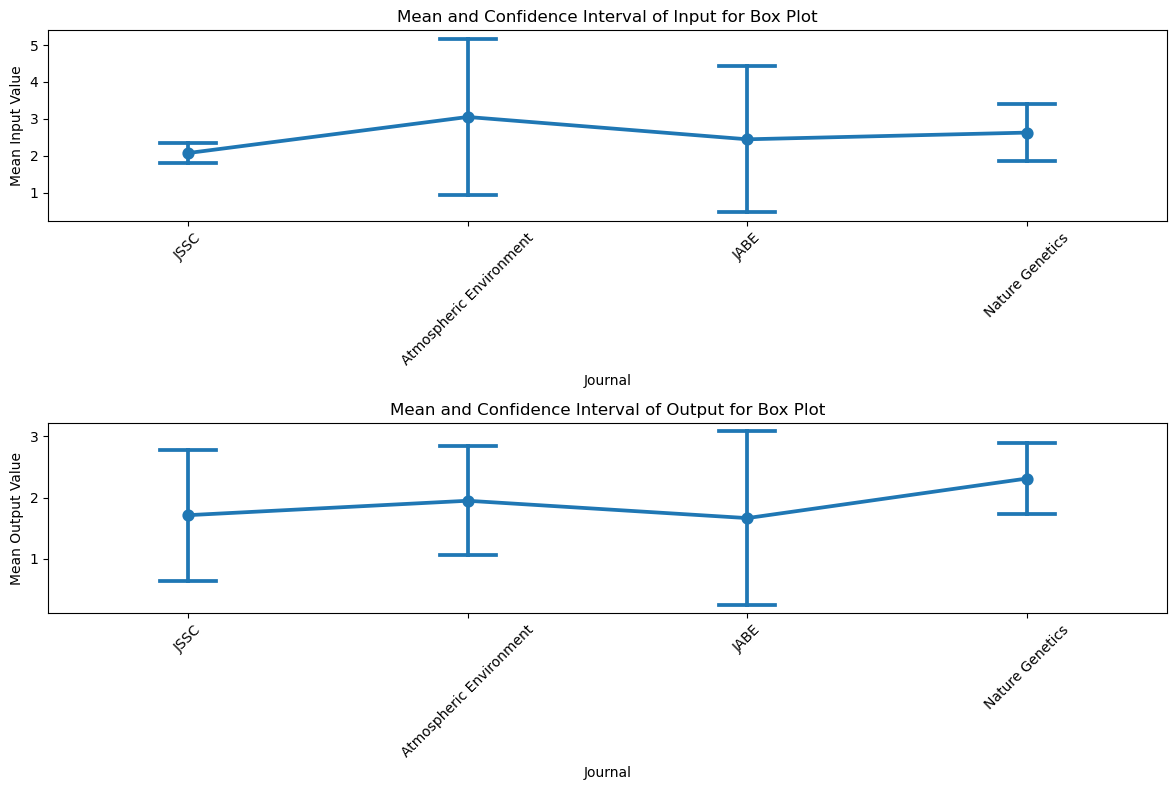

/tmp/ipykernel_284/2552111563.py:69: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_filtered, x='Journal', y='Input', ax=axes[0], capsize=0.2, ci='sd')
/tmp/ipykernel_284/2552111563.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_filtered, x='Journal', y='Output', ax=axes[1], capsize=0.2, ci='sd')


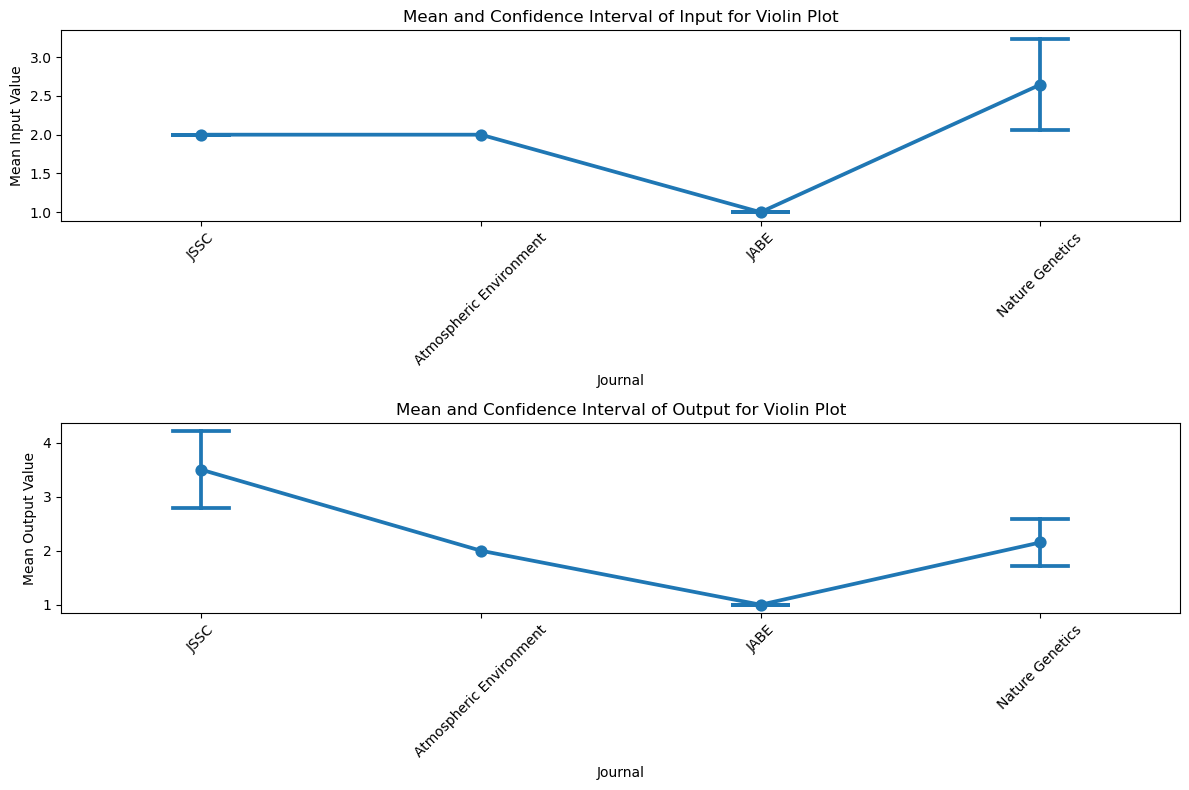

In [1]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Merged_Data.csv")

# Convert 'Input' and 'Output' to numeric
df['Input'] = pd.to_numeric(df['Input'], errors='coerce')
df['Output'] = pd.to_numeric(df['Output'], errors='coerce')
df = df.dropna(subset=['Input', 'Output'])

# Identify the top 6 most common plot types across all journals
top_6_types = df['Type'].value_counts().nlargest(6).index.tolist()

# Filter dataset to only include these plot types
df_top_types = df[df['Type'].isin(top_6_types)]

# Perform ANOVA across journals for each plot type
anova_results_journals = {}

for plot_type in top_6_types:
    df_filtered = df_top_types[df_top_types['Type'] == plot_type]
    
    # ANOVA for Input
    anova_input_pval = stats.f_oneway(
        *[df_filtered[df_filtered['Journal'] == journal]['Input'] for journal in df_filtered['Journal'].unique()]
    ).pvalue

    # ANOVA for Output
    anova_output_pval = stats.f_oneway(
        *[df_filtered[df_filtered['Journal'] == journal]['Output'] for journal in df_filtered['Journal'].unique()]
    ).pvalue

    anova_results_journals[plot_type] = {'Input p-value': anova_input_pval, 'Output p-value': anova_output_pval}

# Perform Tukey HSD if ANOVA is significant
tukey_results_journals = {}

for plot_type in top_6_types:
    df_filtered = df_top_types[df_top_types['Type'] == plot_type]
    
    if anova_results_journals[plot_type]['Input p-value'] < 0.05:
        tukey_input = pairwise_tukeyhsd(df_filtered['Input'], df_filtered['Journal'])
        tukey_results_journals[f"{plot_type} - Input"] = pd.DataFrame(tukey_input.summary().data[1:], columns=tukey_input.summary().data[0])
    
    if anova_results_journals[plot_type]['Output p-value'] < 0.05:
        tukey_output = pairwise_tukeyhsd(df_filtered['Output'], df_filtered['Journal'])
        tukey_results_journals[f"{plot_type} - Output"] = pd.DataFrame(tukey_output.summary().data[1:], columns=tukey_output.summary().data[0])

# Print ANOVA results
print("ANOVA Results Across Journals:")
for plot_type, pvals in anova_results_journals.items():
    print(f"\n{plot_type}: Input p-value = {pvals['Input p-value']}, Output p-value = {pvals['Output p-value']}")

# Print Tukey HSD results
for key, tukey_df in tukey_results_journals.items():
    print(f"\nTukey HSD Results for {key}:")
    print(tukey_df)

# Visualization: Compare Means Across Journals for Each Plot Type
for plot_type in top_6_types:
    df_filtered = df_top_types[df_top_types['Type'] == plot_type]
    
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    
    sns.pointplot(data=df_filtered, x='Journal', y='Input', ax=axes[0], capsize=0.2, ci='sd')
    axes[0].set_title(f'Mean and Confidence Interval of Input for {plot_type}')
    axes[0].set_xlabel('Journal')
    axes[0].set_ylabel('Mean Input Value')
    axes[0].tick_params(axis='x', rotation=45)
    
    sns.pointplot(data=df_filtered, x='Journal', y='Output', ax=axes[1], capsize=0.2, ci='sd')
    axes[1].set_title(f'Mean and Confidence Interval of Output for {plot_type}')
    axes[1].set_xlabel('Journal')
    axes[1].set_ylabel('Mean Output Value')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


In [2]:
for plot_type in top_6_types:
    df_filtered = df_top_types[df_top_types['Type'] == plot_type]

    # 只在 ANOVA 结果显著时执行 Tukey HSD
    if anova_results_journals[plot_type]['Input p-value'] < 0.05:
        tukey_input = pairwise_tukeyhsd(df_filtered['Input'], df_filtered['Journal'])
        tukey_results_journals[f"{plot_type} - Input"] = pd.DataFrame(tukey_input.summary().data[1:], columns=tukey_input.summary().data[0])
    else:
        print(f"Skipping Tukey HSD for {plot_type} - Input (p-value: {anova_results_journals[plot_type]['Input p-value']})")

    if anova_results_journals[plot_type]['Output p-value'] < 0.05:
        tukey_output = pairwise_tukeyhsd(df_filtered['Output'], df_filtered['Journal'])
        tukey_results_journals[f"{plot_type} - Output"] = pd.DataFrame(tukey_output.summary().data[1:], columns=tukey_output.summary().data[0])
    else:
        print(f"Skipping Tukey HSD for {plot_type} - Output (p-value: {anova_results_journals[plot_type]['Output p-value']})")

Skipping Tukey HSD for Line Plot - Input (p-value: 0.058684544433257615)
Skipping Tukey HSD for Bar Plot - Input (p-value: 0.2624524505676664)
Skipping Tukey HSD for Box Plot - Input (p-value: 0.059701483427880814)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set(style="whitegrid")

# 可视化 ANOVA 结果（p-values）
fig, ax = plt.subplots(figsize=(10, 6))
anova_results_df.plot(kind="bar", ax=ax, rot=45)
ax.set_title("ANOVA p-values Across Journals for Top 6 Plot Types")
ax.set_ylabel("p-value")
ax.axhline(y=0.05, color="r", linestyle="--", label="Significance Threshold (0.05)")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 可视化 Tukey HSD 结果（如果存在显著结果）
for key, tukey_df in tukey_results_journals.items():
    if not tukey_df.empty:
        plt.figure(figsize=(12, 6))
        sns.barplot(data=tukey_df, x="group1", y="meandiff", hue="group2", dodge=True)
        plt.axhline(0, color="red", linestyle="--")
        plt.title(f"Tukey HSD Results for {key}")
        plt.xlabel("Group 1")
        plt.ylabel("Mean Difference")
        plt.xticks(rotation=45)
        plt.legend(title="Group 2", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


Skipping Tukey HSD for Line Plot - Input (p-value: 0.058684544433257615)
Skipping Tukey HSD for Bar Plot - Input (p-value: 0.2624524505676664)
Skipping Tukey HSD for Box Plot - Input (p-value: 0.059701483427880814)

ANOVA Results Across Journals:
              Input p-value  Output p-value
Line Plot          0.058685    3.880784e-10
Bar Plot           0.262452    1.121906e-05
Scatter Plot       0.000002    1.975158e-17
Heatmap            0.047421    1.527049e-42
Box Plot           0.059701    9.850413e-05
Violin Plot        0.000490    1.381925e-06

Tukey HSD Results for Line Plot - Output:
                    group1           group2  meandiff   p-adj   lower   upper  \
0  Atmospheric Environment             JABE   -0.7043  0.0090 -1.2788 -0.1298   
1  Atmospheric Environment             JSSC    0.7281  0.0007  0.2414  1.2149   
2  Atmospheric Environment  Nature Genetics    0.3247  0.2000 -0.0997  0.7492   
3                     JABE             JSSC    1.4325  0.0000  0.8820  1.9829 

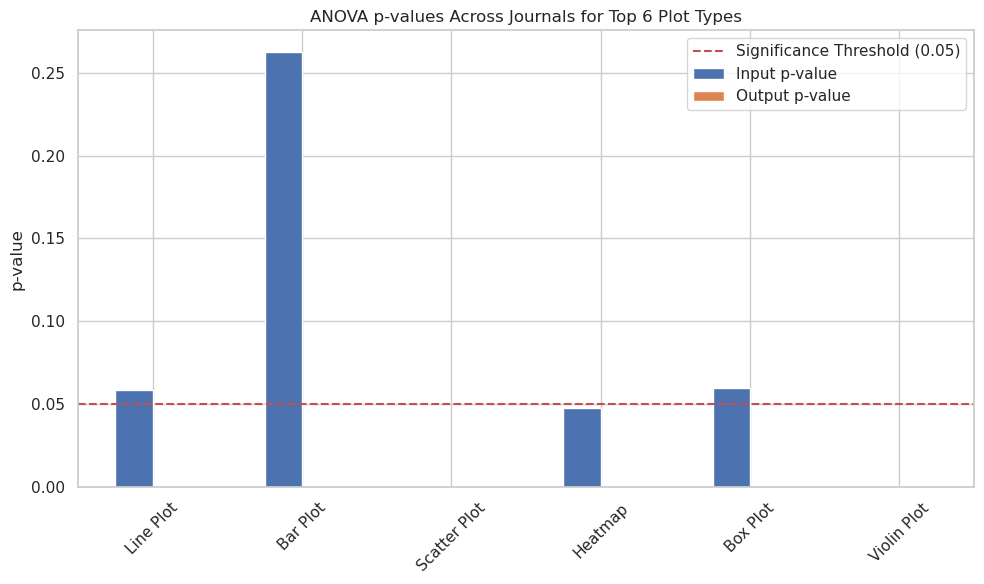

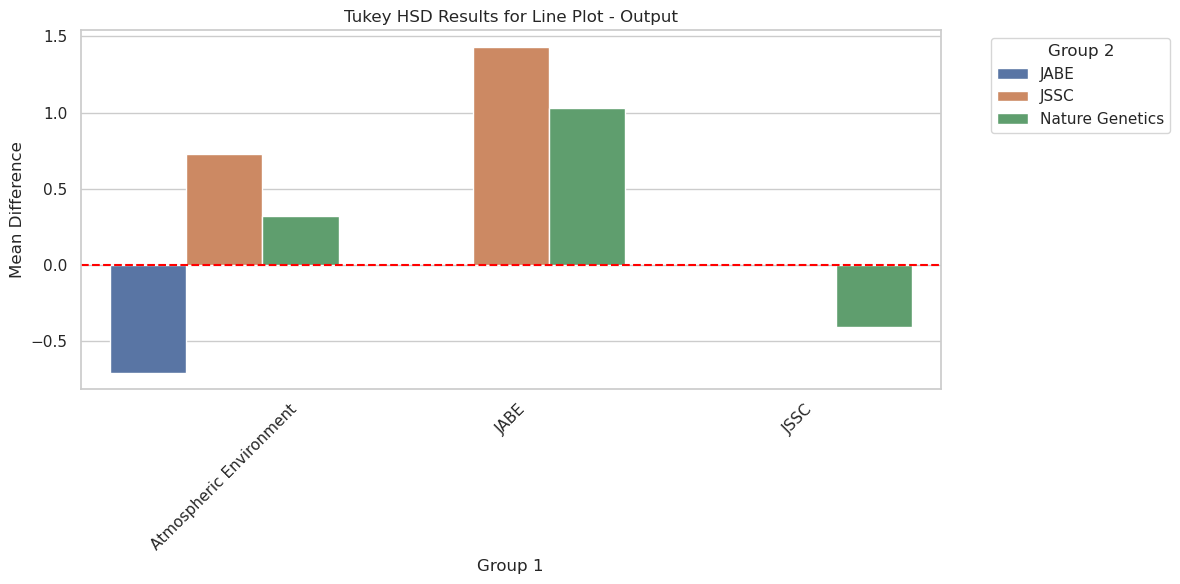

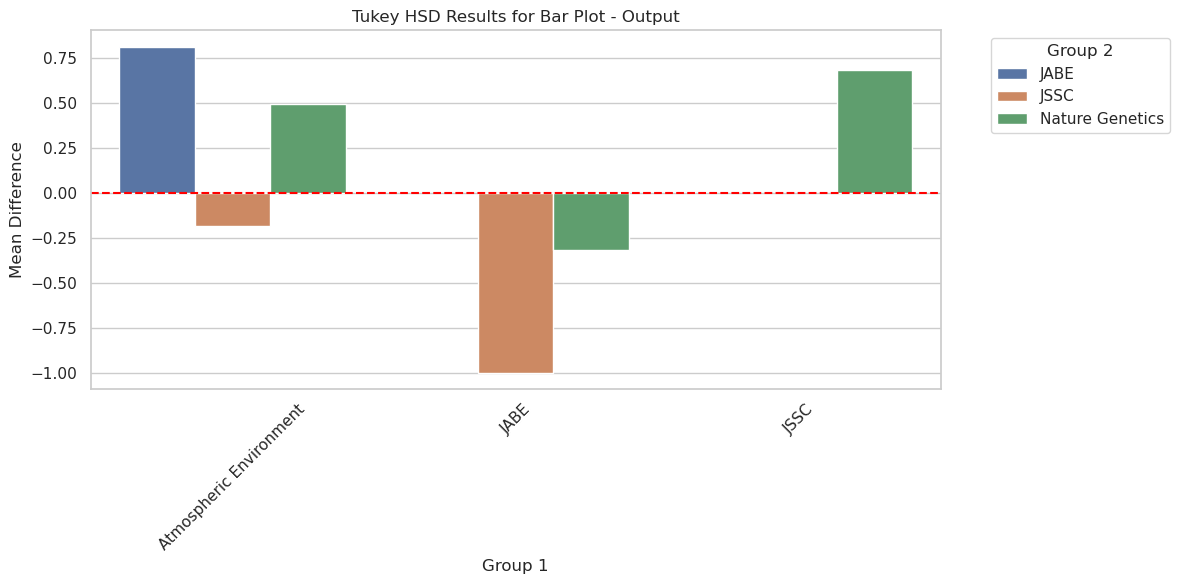

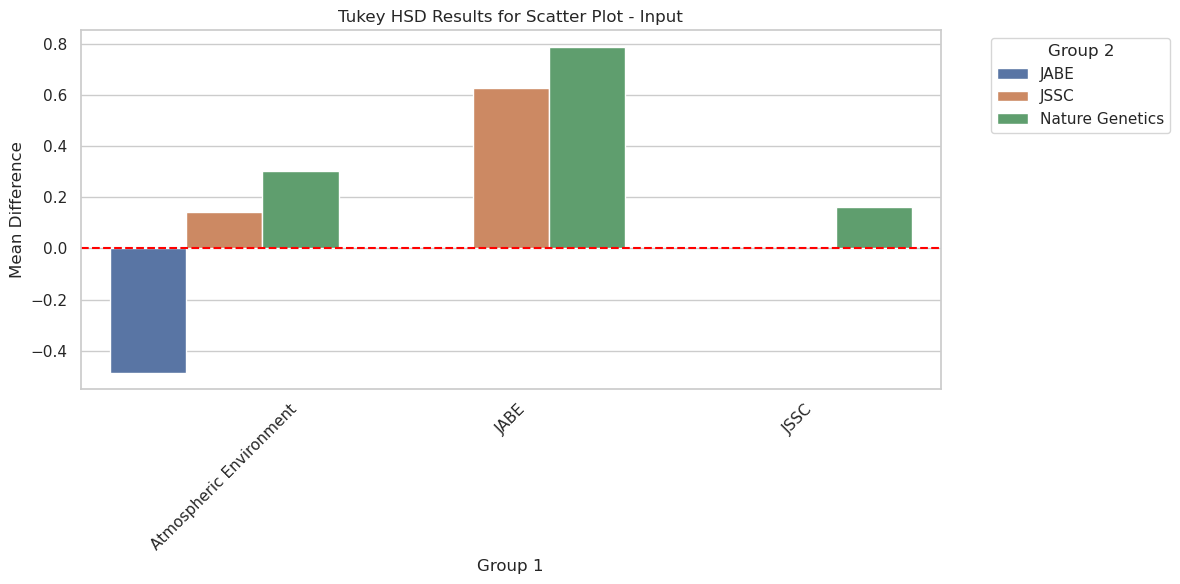

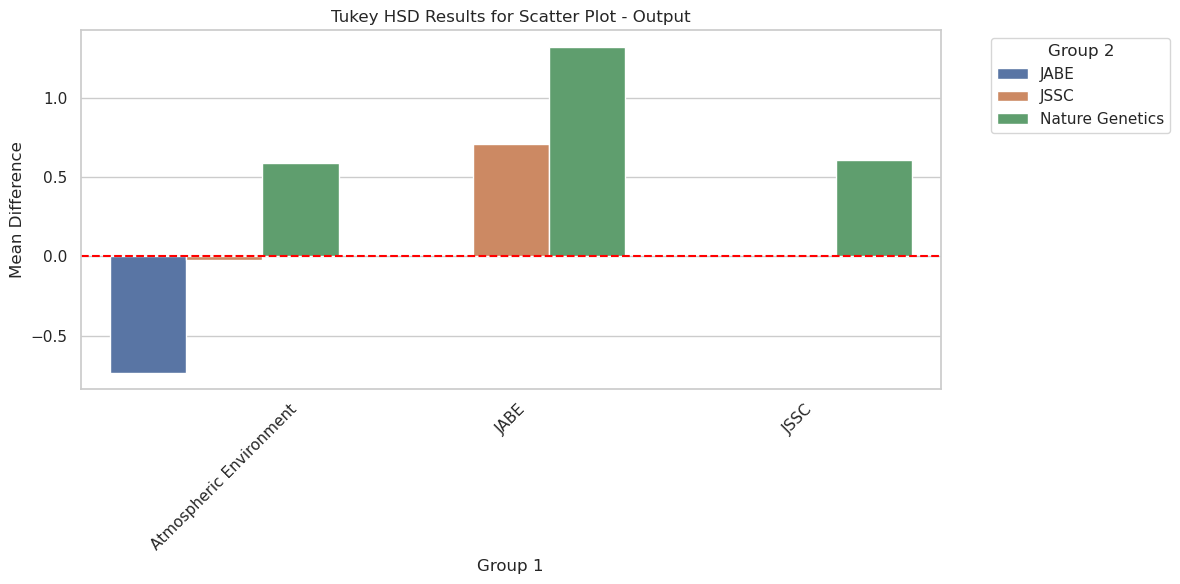

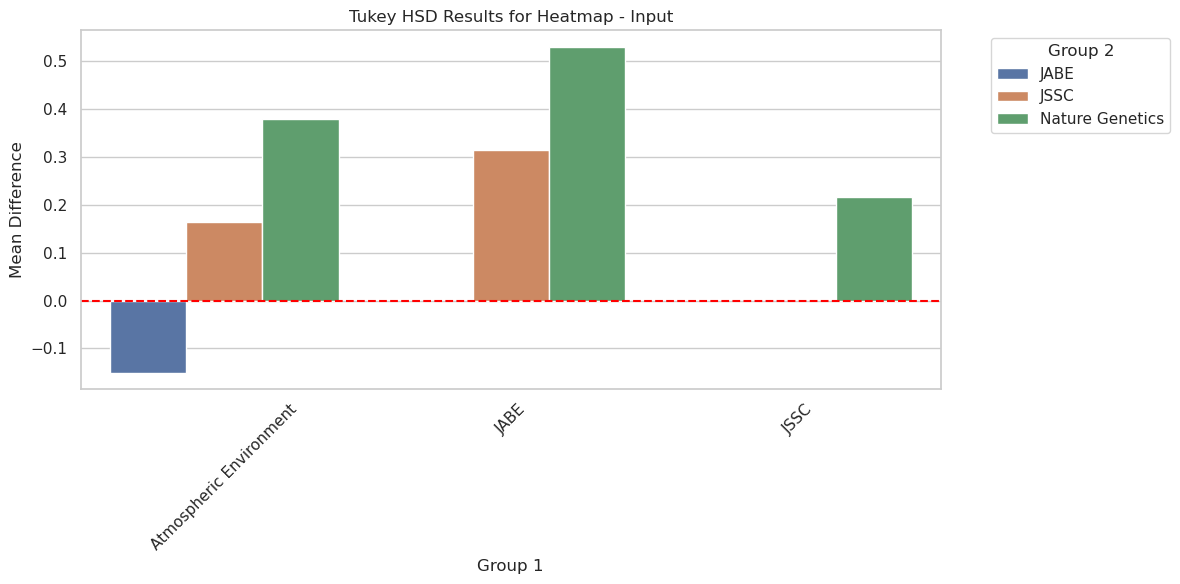

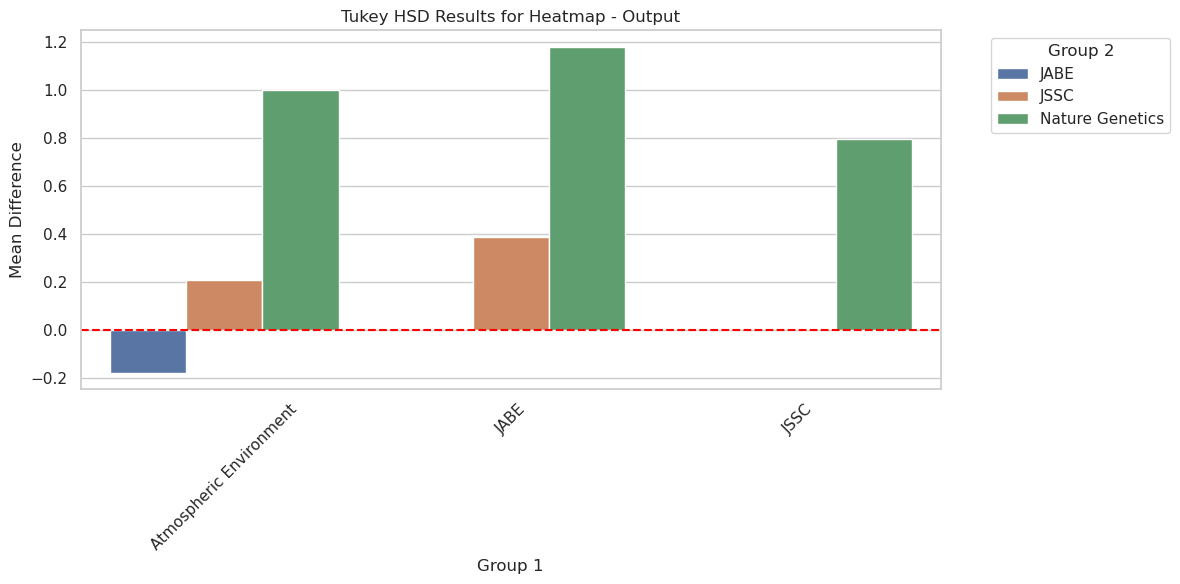

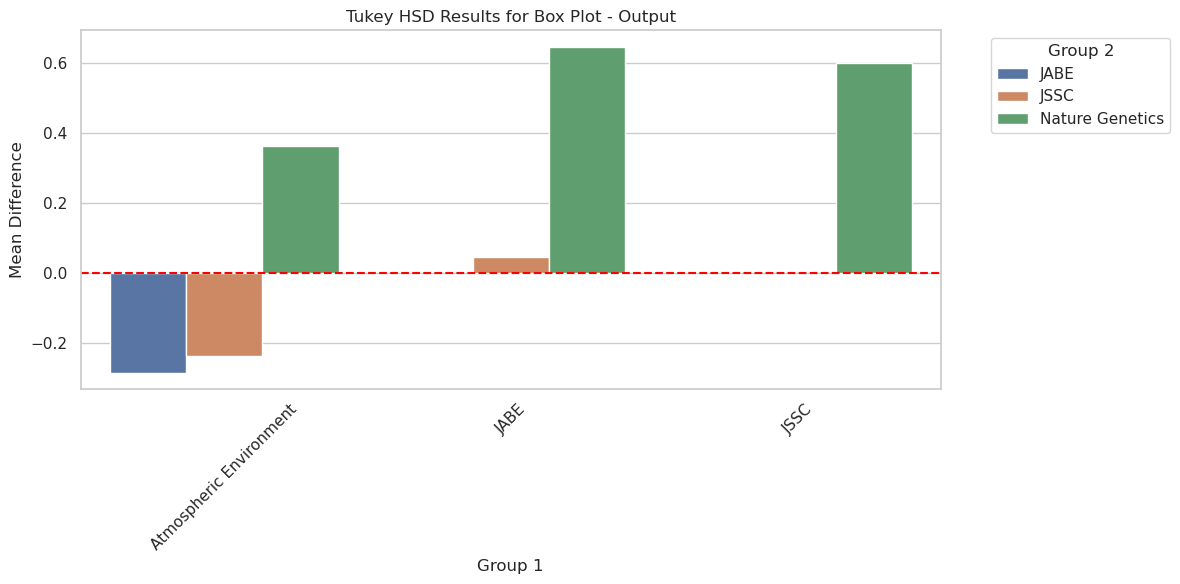

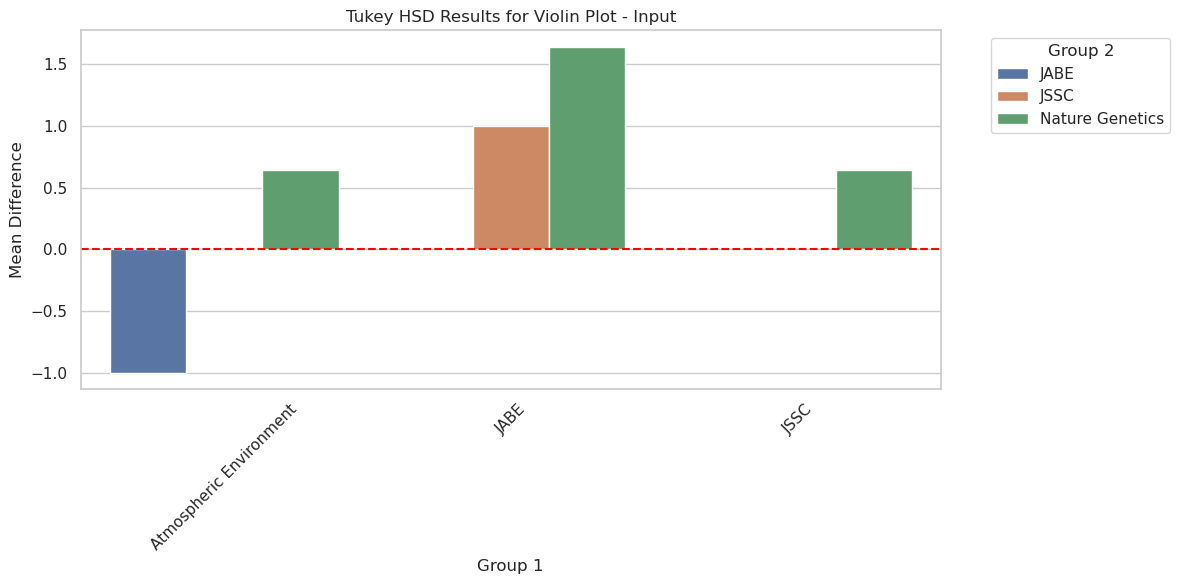

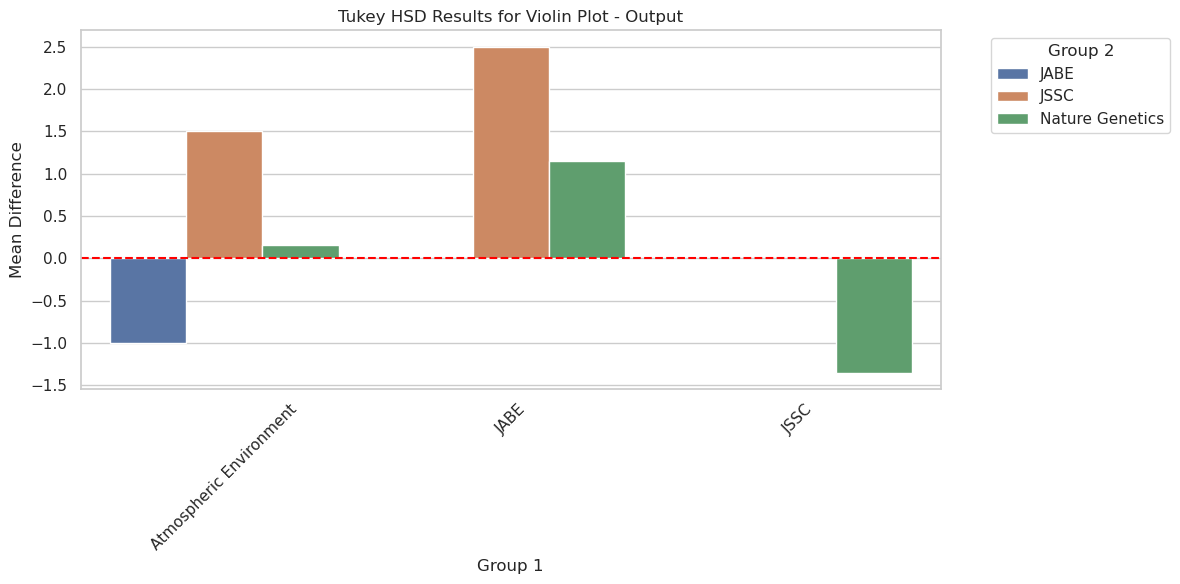

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set(style="whitegrid")

# 可视化 ANOVA 结果（p-values）
fig, ax = plt.subplots(figsize=(10, 6))
anova_results_df.plot(kind="bar", ax=ax, rot=45)
ax.set_title("ANOVA p-values Across Journals for Top 6 Plot Types")
ax.set_ylabel("p-value")
ax.axhline(y=0.05, color="r", linestyle="--", label="Significance Threshold (0.05)")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 可视化 Tukey HSD 结果（如果存在显著结果）
for key, tukey_df in tukey_results_journals.items():
    if not tukey_df.empty:
        plt.figure(figsize=(12, 6))
        sns.barplot(data=tukey_df, x="group1", y="meandiff", hue="group2", dodge=True)
        plt.axhline(0, color="red", linestyle="--")
        plt.title(f"Tukey HSD Results for {key}")
        plt.xlabel("Group 1")
        plt.ylabel("Mean Difference")
        plt.xticks(rotation=45)
        plt.legend(title="Group 2", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
